# Regresija


_Regresija_ je provlačenje funkcije $f$ koja ovisi o $n$ parametara kroz točke $(x_i,y_i)$, $i=1,2,\ldots, m$, pri čemu je $m>n$, tako da se _minimizira norma odstupanja_:

$$
\| f(x_i)-y_i\|_{1,2,\infty}\to \min.
$$

Regresija u _smislu najmanjih kvadrata_ je

$$
\| f(x_i)-y_i\|_{2}\to \min.
$$

Kada je funkcija $f$ pravac,

$$ 
f(x)=kx+l,
$$

radi se o _linearnoj regresiji_. U tom slučaju dobije se sustav linearnih jednadžbi

$$
k x_i + l=y_i, \quad i=1,2,\ldots,m.
$$

Ukoliko sve točke _ne leže na istom pravcu_, sustav nije rješiv pa se računa kvadratična prilagodba.

## Primjer

Provucimo pravac kroz točke $(x_i,y_i)$, $i=1,\ldots,m$, i izračunajmo kvalitetu prilagodbe. 

In [1]:
n=5
x=collect([1,2,4,6,7])
y=collect([1,3,2,4,3])
A=[x ones(5)]

5×2 Array{Float64,2}:
 1.0  1.0
 2.0  1.0
 4.0  1.0
 6.0  1.0
 7.0  1.0

In [2]:
# Koeficijenti
using LinearAlgebra
(k,l)=A\y

2-element Array{Float64,1}:
 0.3076923076923079
 1.3692307692307677

In [3]:
using Plots

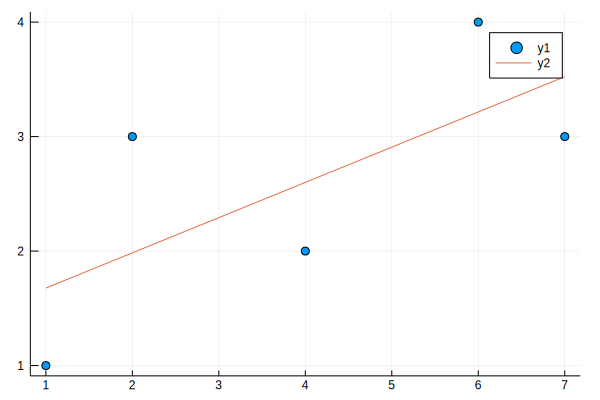

In [4]:
# Nacrtajmo točke i pravac
f(x)=k*x+l
scatter(x,y)
plot!(x->x,f,x[1],x[end])

In [6]:
# Kvaliteta prilagodbe
q=sqrt(norm(A*[k;l]-y)/norm(y))

0.5147667768205638

## Primjer - Kvadratična regresija

Kroz točke možemo provući i kvadratni polinom $y=ax^2+bx+c$. Ukoliko sve točke ne leže na istoj paraboli, sustav linearnih jednadžbi 

$$
ax_i^2+bx_i+c=y_i, \quad i=1,\ldots,m,
$$

nije rješiv pa računamo kvadratičnu prilagodbu. 

In [7]:
n=5
x=collect([1,2,4,5,6])
y=collect([0,1,4,8,14])
A=[x.^2 x ones(n)]

5×3 Array{Float64,2}:
  1.0  1.0  1.0
  4.0  2.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

In [8]:
# Koeficijenti polinoma
(a,b,c)=A\y

3-element Array{Float64,1}:
  0.6899350649350633
 -2.1607142857142745
  1.8636363636363449

In [9]:
# Nacrtajmo točke i parabolu
g(x)=a*x^2+b*x+c

g (generic function with 1 method)

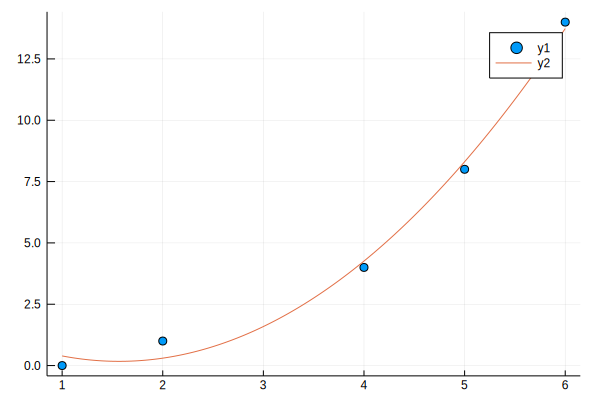

In [10]:
scatter(x,y)
plot!(x->x,g,x[1],x[end])

In [11]:
# Kvaliteta prilagodbe
q=sqrt(norm(A*[a;b;c]-y)/norm(y))

0.23696295042459756

## Primjer - Rast svjetske populacije

Dosadašnji rast populacije (u milionima) da je u sljedećoj tablici (vidi http://en.wikipedia.org/wiki/World_population ). 

$$
\begin{array}{c|c|c|c|c|c|c|c|c|c}
\textrm{godina} & 1750 & 1800 & 1850 & 1900 & 1950 & 1999 & 2008 & 2010 & 2012 \\ \hline
\textrm{populacija (milijuni)} & 791 & 978 & 1262 & 1650 & 2521 & 5978 & 6707 & 6896 & 7052 
\end{array}
$$




Aproksimirajmo rast populacije eksponencijalnom funkcijom 

$$
P(t)=Ce^{kt}
$$

i predvidimo populaciju 2050. godine.

Sustav jednadžbi 

$$
Ce^{kt_i}=P_i, \quad i=1,2,\ldots, 9
$$

logaritmiranjem prelazi u sustav linearnih jednadžbi

$$
k \,t_i + \ln C =\ln P_i.
$$

Sve točke ne leže na istoj krivulji pa sustav nije rješiv i računamo kvadratičnu prilagodbu.

In [12]:
n=9
t=collect([1750,1800,1850,1900,1950,1999,2008,2010,2012])
P=collect([791,978,1262,1650,2521,5978,6707,6896,7052])
A= [t ones(9)]
(k,C)=A\log.(P)

2-element Array{Float64,1}:
  0.008834419929650826
 -9.055914228293954   

In [13]:
# Vrijednosti na krivulji
P₁(t)=exp(C)*exp(k*t)

P₁ (generic function with 1 method)

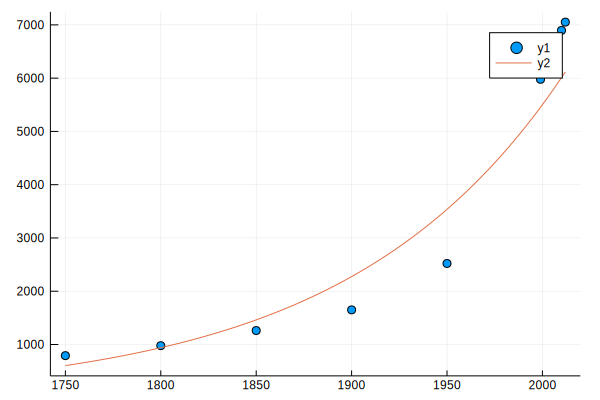

In [14]:
# Nacrtajmo točke i krivulju
scatter(t,P)
plot!(t->t,P₁,t[1],t[end])

In [15]:
# predvidimo populaciju 2050 godine
P2050=P₁(2050)

8558.212502172595

Izračunata predikcija je manja od one u tablici. Ako se ograničimo na razdoblje od 1950 godine imamo:

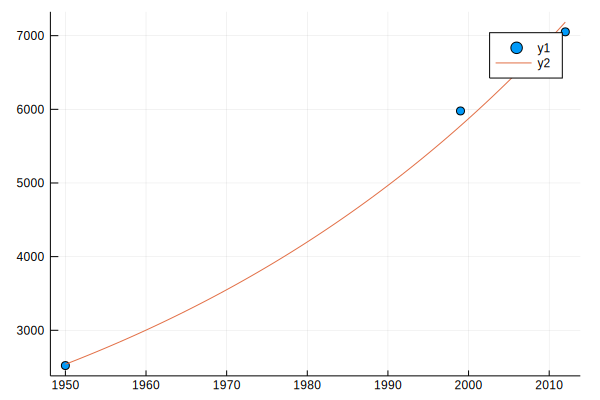

In [16]:
A= [t[5:end] ones(5)]
(k,C)=A\log.(P[5:end])
P₂(t)=exp(C)*exp(k*t)
scatter(t[5:end],P[5:end])
plot!(t->t,P₂,t[5],t[end])

In [17]:
P2050=P₂(2050)

13592.0770645014